In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from itertools import chain
import math
%matplotlib inline

# Project WP1-2
### code 9: load and present regions between regions, hourly based
<span style='font-family:"Times New Roman"'> <span styel=''> 
This code is to cope with the loading and present regions of hourly based datasets. Routes in every region have been clarified. 
Please see the document file: "C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions_hourly/"


#  functions for loading files 

In [79]:
def readFiles(mypath="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions_hourly/"):
    """
    return a list contaning all the file names in given directory
    """
    from os import listdir
    from os.path import isfile, join
    # epair path to files by join(path,file)
    # isfile:check if it is a standard file
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return files

def get_fileNames(regionStart,*regionEnd):
    """
    obtain all file names contain regionStart and one of the name in regionEnd.
    regionStart: string, the main region in file, either used as the start region or the destination region
    *regionEnd: one or more strings, different regions.
    
    return--> a list containing all needed files
    """
    # read all files names (600) in the given file directory
    fileLists=readFiles()
    
    selected_files=[]
    print (regionStart)
    print (regionEnd)
    for elem in fileLists:
        for region2 in regionEnd:
            if (regionStart in elem) and (region2 in elem):
                selected_files.append(elem)
    return selected_files

def loadfiles(fileLists,path="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions_hourly/"):
    """
    read all files in the given lists.
    fileLists:list
    return: a dataframe with all the csv data
    """
    df=pd.DataFrame()
    for file in fileLists:
        assert isinstance(file,str)==True,"{} is not a string".format(file)
        df_temp=pd.read_csv(path+file)
        df=df.append(df_temp)
    df=df.reset_index()

    return df


def draw_map(m, scale=0.5):
    """
    plot backgroud map
    m: Basemap object
    scale: plot scale
    return: plot a backgroud map
    """
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    #m.bluemarble(scale=scale)  #Project NASA's blue marble image onto the map
    #m.drawcoastlines()
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def plotPorts(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-30,60,100,330)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.ais_lon_new,df.Latitude,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def plotPorts_1(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-90,90,-180,180)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.Longitude,df.Latitude,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def trans_coods(df):
    """
    transform the coordinates of longituds from format (-180,180) to format (0,360)
    return: a new dataframe with an extra column "ais_lon_new"
    """
    df_copy=df.copy()
    for ix,row in df_copy.iterrows():

        lon=row["Longitude"]

        if lon<=0:
            df_copy.at[ix,"ais_lon_new"]=lon+360
        else:
            df_copy.at[ix,"ais_lon_new"]=lon
    return df_copy


#  choose the region files you want to select, and load them together

In [102]:
#select regions between West Latin and NE Asia, West Latin and East Asia
files_lists_1=get_fileNames("West_Latin","NE_Asia","East_Asia")

# select regions between NW Ame and NE Asia, NW Ame and E Asia
files_lists_2=get_fileNames("NW_Ame","NE_Asia","East_Asia")

#select regions between SW Ame and East Asia, SW Ame and NE Asia, SW Ame and Gulf
files_lists_3=get_fileNames("SW_Ame","NE_Asia","East_Asia","Gulf","Caribbean")

# combine route 1 and route 3 based on their similarity:
files_westAme2EastAsia=list(set(files_lists_1+files_lists_3))

print (files_westAme2EastAsia)

West_Latin
('NE_Asia', 'East_Asia')
NW_Ame
('NE_Asia', 'East_Asia')
SW_Ame
('NE_Asia', 'East_Asia', 'Gulf', 'Caribbean')
['aisH_SW_Ame2Caribbean.csv', 'aisH_East_Asia2SW_Ame.csv', 'aisH_Gulf2SW_Ame.csv', 'aisH_Caribbean2SW_Ame.csv', 'aisH_NE_Asia2West_Latin.csv', 'aisH_East_Asia2West_Latin.csv', 'aisH_West_Latin2East_Asia.csv', 'aisH_SW_Ame2NE_Asia.csv', 'aisH_SW_Ame2Gulf.csv', 'aisH_NE_Asia2SW_Ame.csv', 'aisH_West_Latin2NE_Asia.csv', 'aisH_SW_Ame2East_Asia.csv']


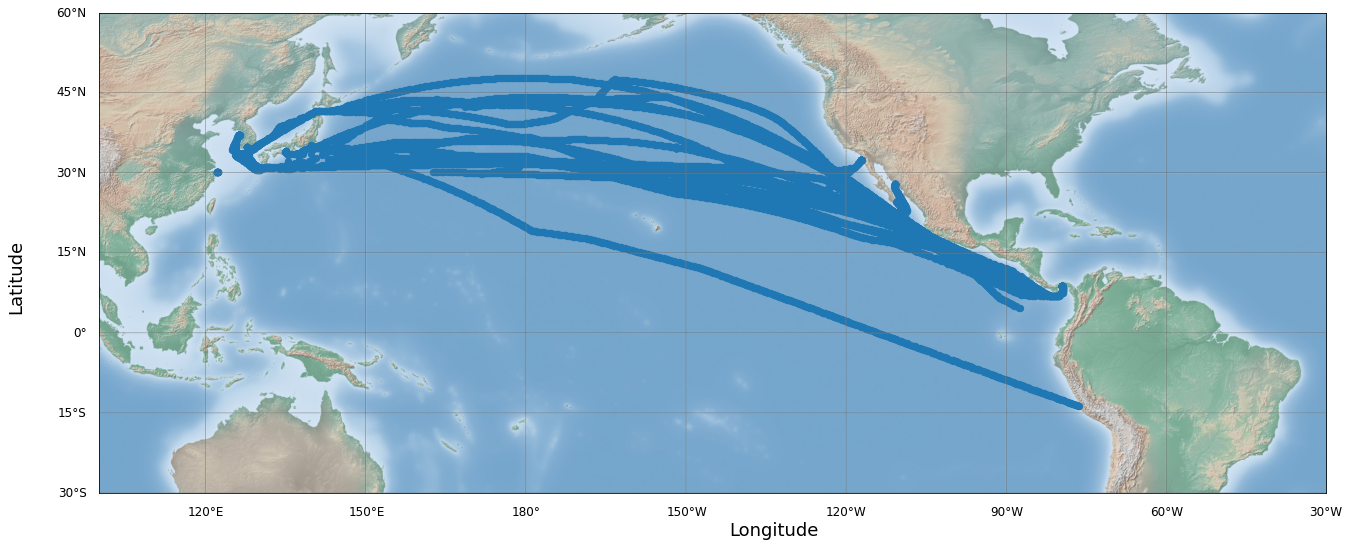

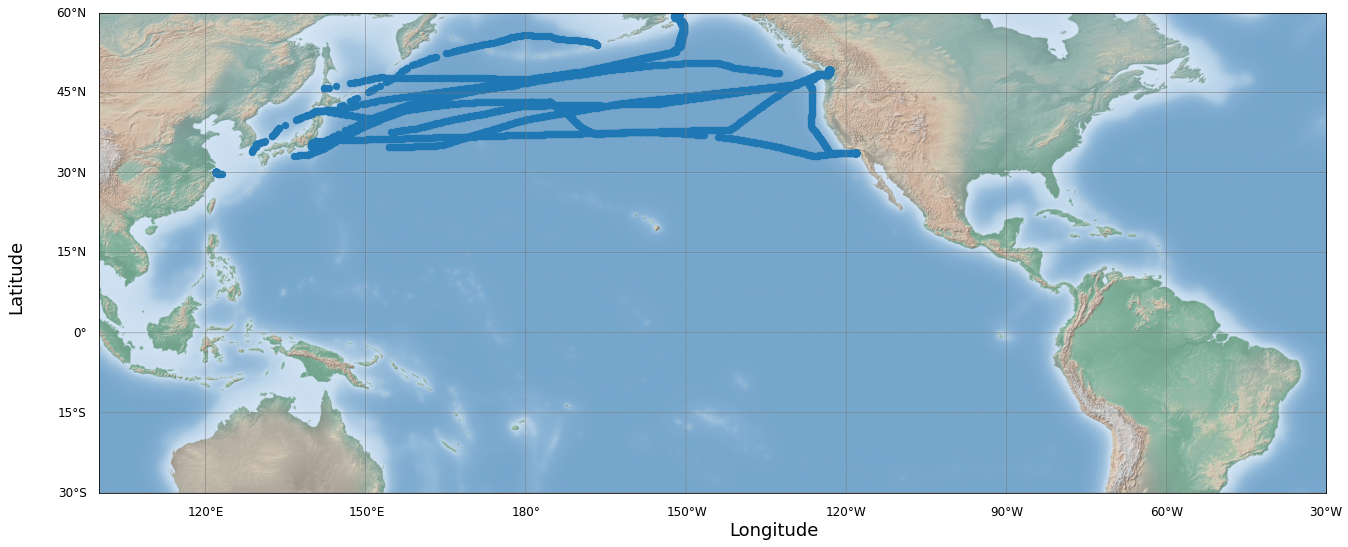

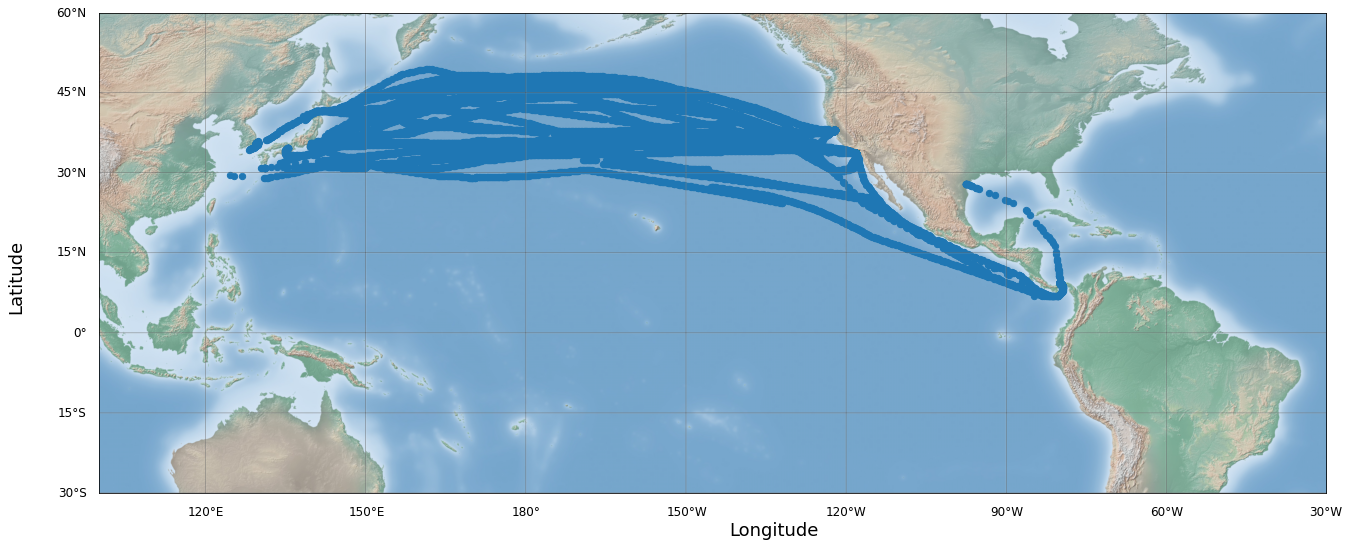

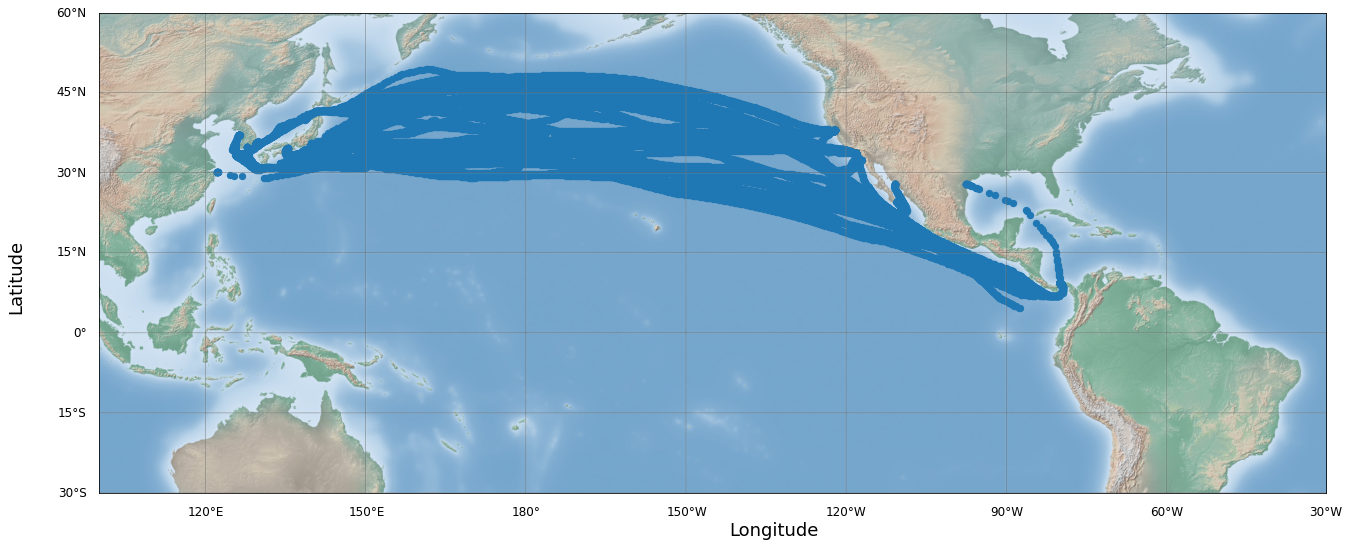

In [107]:
df1=loadfiles(files_lists_1)
df1=trans_coods(df1)
plotPorts(df1)

df2=loadfiles(files_lists_2)
df2=trans_coods(df2)
plotPorts(df2)

df3=loadfiles(files_lists_3)
df3=trans_coods(df3)
plotPorts(df3)

# remove the journey id 33, which is an exceptional due to region assignment
df4=loadfiles(files_westAme2EastAsia)
df4=df4[df4.journey_id!=33]
df4=trans_coods(df4)
plotPorts(df4)


In [109]:
df4.to_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/aisRoutes_westAme2EastAsia.csv",index=False)